## Problem Statement
<img src="https://lmg-labmanager.s3.amazonaws.com/assets/articleNo/28527/aImg/51505/new-methodology-helps-predict-soil-recovery-after-wildfires-l.jpg" alt="Alternative text" style = "height : 500px , width : 500px , border : 2px" />

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.>


## Logistic Regression

Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

###### Working of a Logistic Model
For linear regression, the model is defined by:
$y = \beta_0 + \beta_1x  $       - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense
.
So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.


In [55]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [15]:
data = pd.read_csv('data.csv')

In [16]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [17]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0.0


In [18]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.563786
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496938
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    float64
dtypes: float64(6), int64(6), object(2)
memory usage: 26.8+ KB


In [20]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [57]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,0.563786
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.496938
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


c:\users\ayush poojari\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


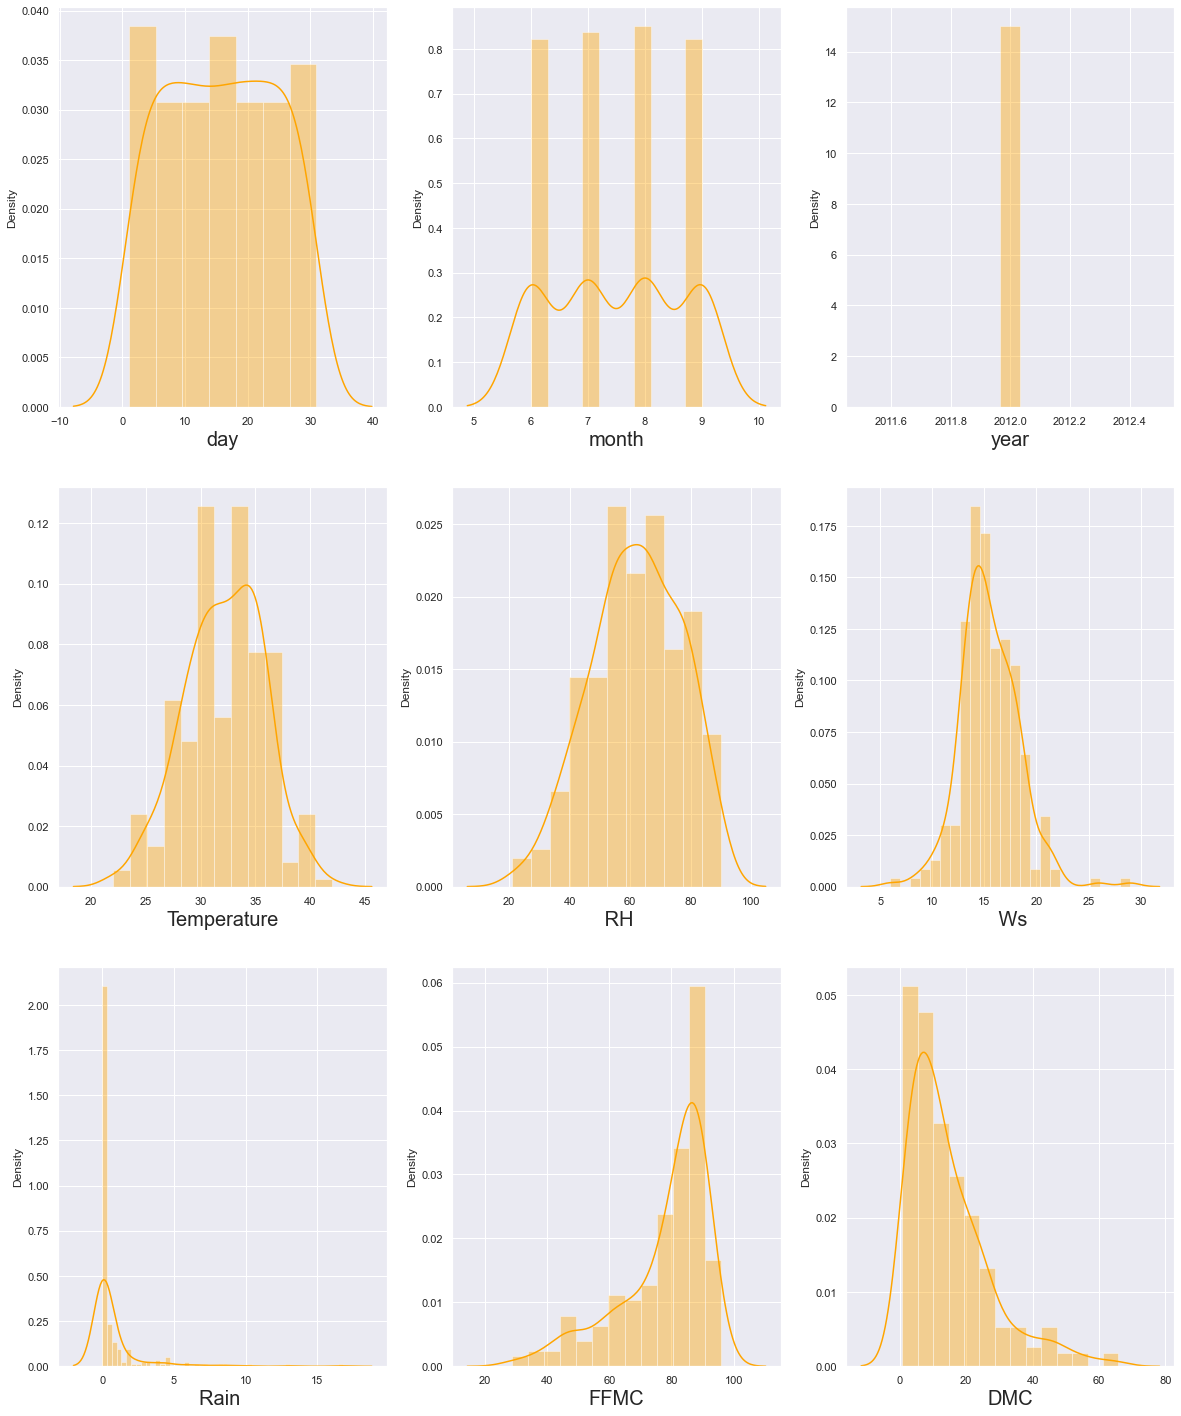

In [95]:
# let's see how data is distributed for every column
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(20,25), facecolor='white' )
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column], color = 'orange')
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

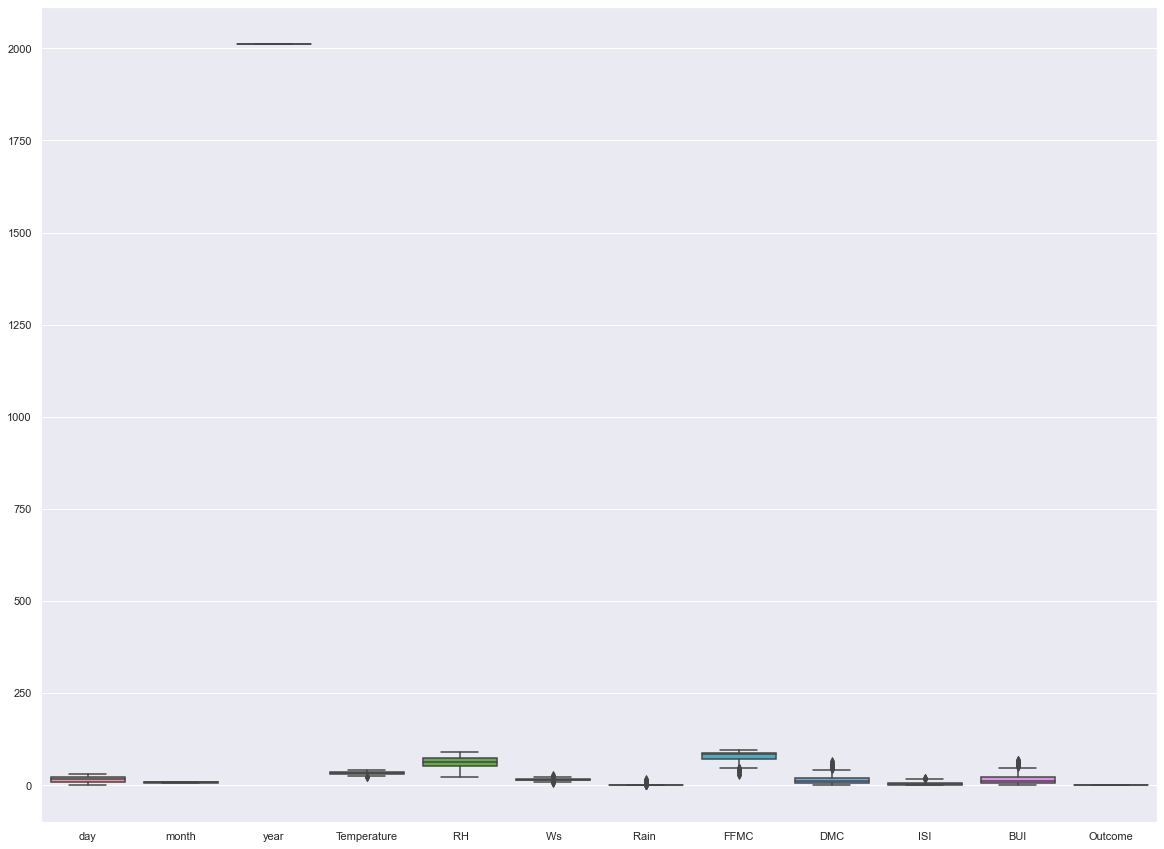

In [118]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data, width= 0.8,ax=ax,  fliersize = 5)

In [100]:
data['Outcome'] = data['Classes  ']
data.drop('Classes  ', axis = 1 , inplace = True)
data['Outcome'] = data['Outcome'].astype(int)

In [105]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Outcome
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [180]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Outcome
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [ ]:
X = data.drop('Outcome')

In [107]:
y = data['Outcome']

In [108]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [109]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int32

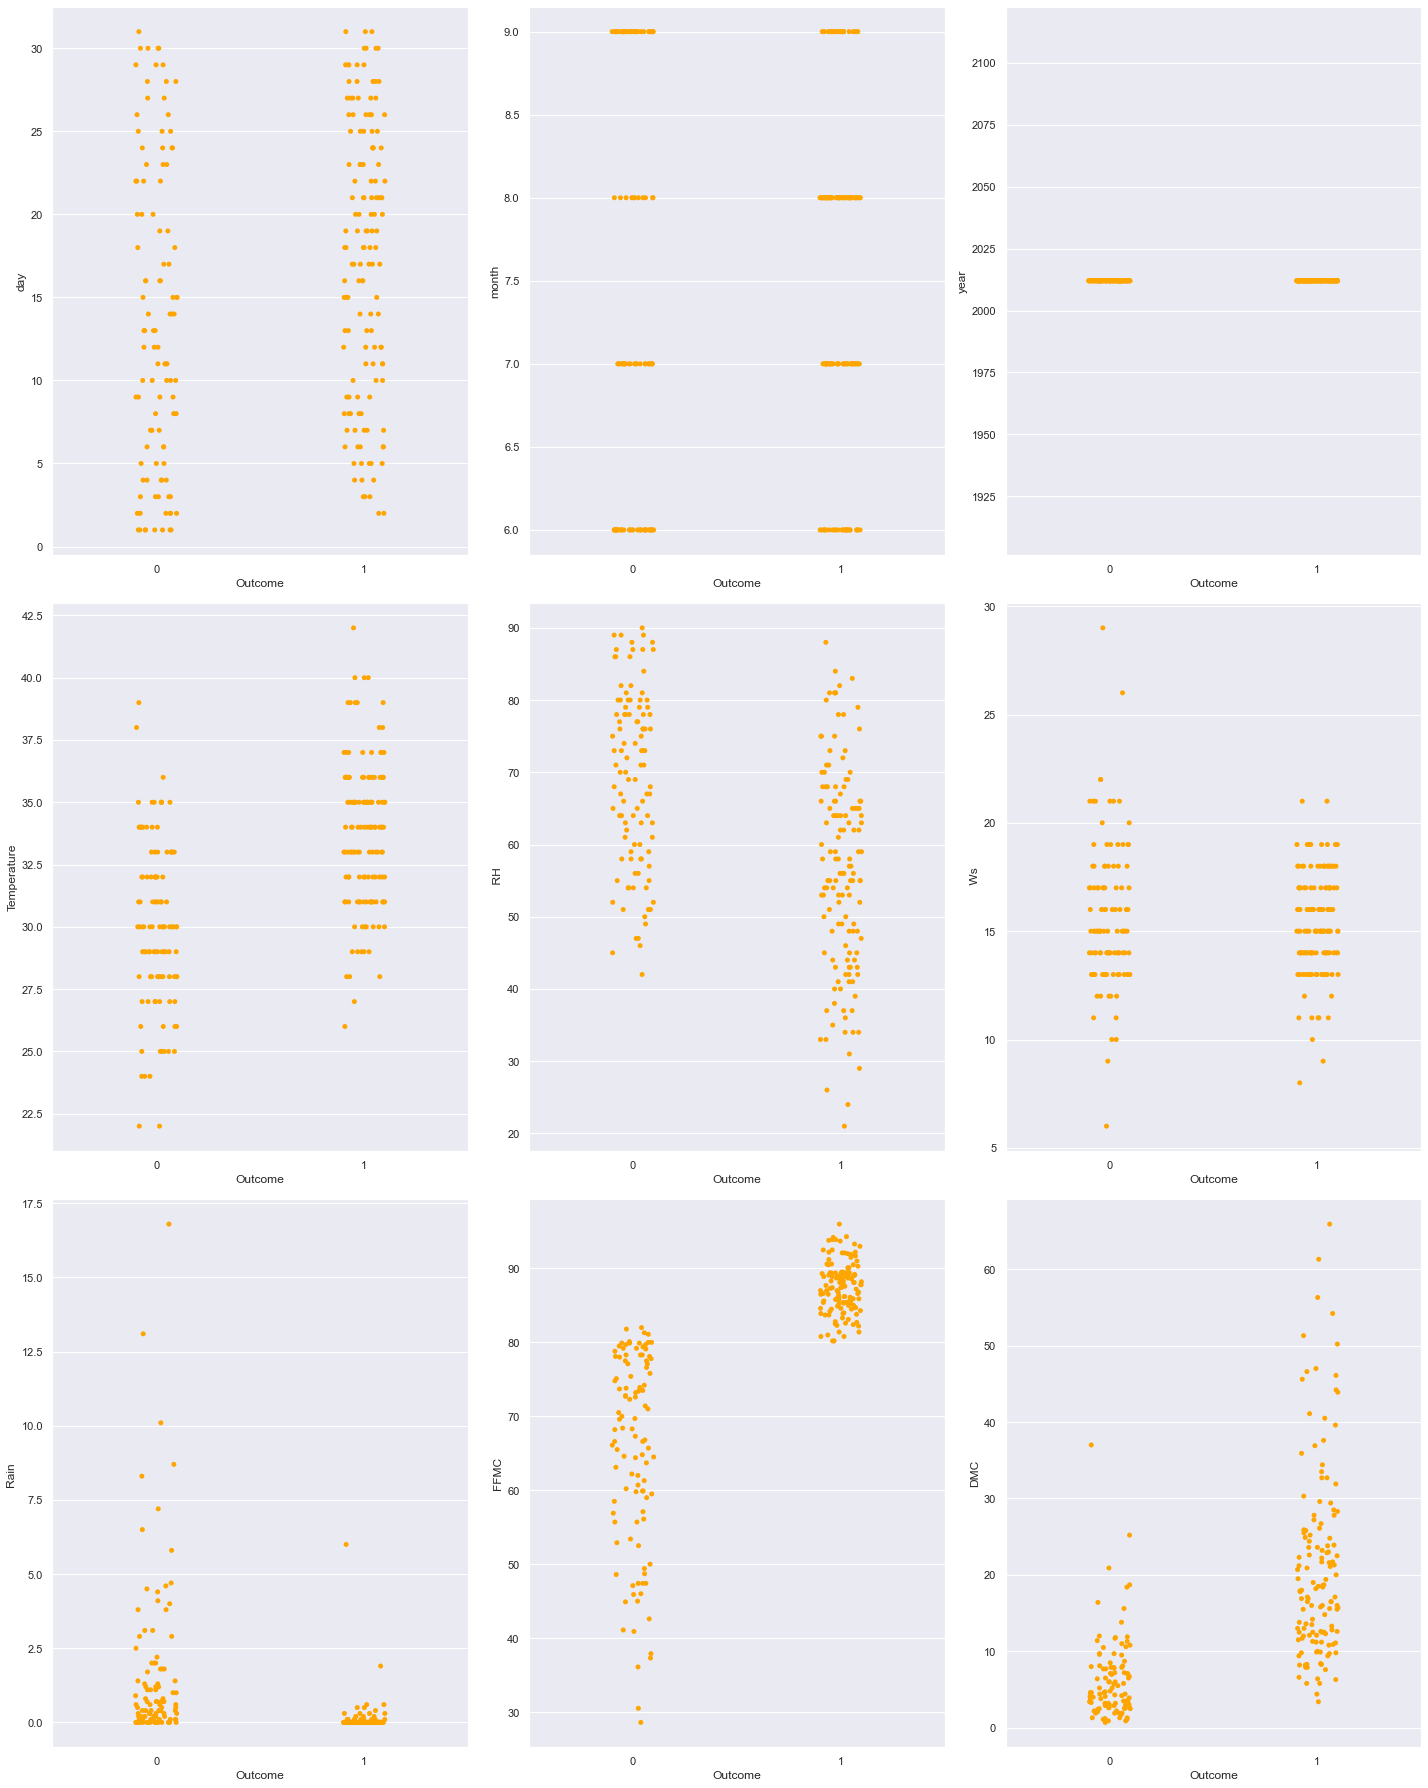

In [123]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column],color = 'orange')
    plotnumber+=1
plt.tight_layout()

#### [Dataset Balance or Imbalanced ?]

In [135]:
y.value_counts()[1]

137

In [137]:
y.value_counts()[0]

106

In [139]:
(137/(137 + 106))*100

56.37860082304527

In [140]:
(106/(137 + 106))*100

43.62139917695473

#### The dataset is balanced

#### Therefore it should give accuracy > 90%

#### Standard Scaler

In [124]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [125]:
X_scaled

array([[-1.67279579, -1.35016751,  0.        , ..., -0.83035573,
        -0.93601155, -0.88015863],
       [-1.55947285, -1.35016751,  0.        , ..., -0.90272026,
        -0.90079808, -0.8936262 ],
       [-1.44614991, -1.35016751,  0.        , ..., -1.07157084,
        -0.98531039, -0.93402893],
       ...,
       [ 1.38692352,  1.34646842,  0.        , ..., -1.04744933,
        -0.93601155, -0.92056135],
       [ 1.50024646,  1.34646842,  0.        , ..., -0.73386968,
        -0.81628577, -0.85322348],
       [ 1.6135694 ,  1.34646842,  0.        , ..., -0.85447724,
        -0.83741385, -0.88015863]])

In [126]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
#let's check the values
vif

c:\users\ayush poojari\appdata\local\programs\python\python39\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,1.487120,day
1,1.088510,month
2,NaN,year
3,2.415204,Temperature
4,2.764923,RH
5,1.312931,Ws
6,1.551373,Rain
7,4.120286,FFMC
8,76.480443,DMC
9,25.363045,DC


#### Train Test Split

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 45)

#### Logistic Regression Model

In [129]:
loreg = LogisticRegressionc()
loreg.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_pred = loreg.predict(X_test)

In [131]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [132]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9672131147540983

#### Confusion Matrix

A typical confusion matrix looks like the figure shown.
Where the terms have the meaning:

	__True Positive(TP):__ A result that was predicted as positive by the classification model and also is positive

	__True Negative(TN):__ A result that was predicted as negative by the classification model and also is negative

	__False Positive(FP):__ A result that was predicted as positive by the classification model but actually is negative

	__False Negative(FN):__ A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

In [144]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

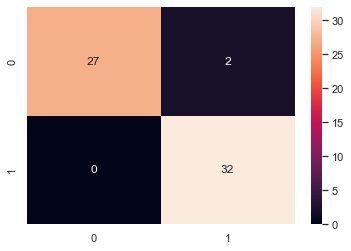

In [145]:
sns.heatmap(cf_matrix, annot=True)

In [147]:
true_positive = cf_matrix[0][0]
false_positive = cf_matrix[0][1]
false_negative = cf_matrix[1][0]
true_negative = cf_matrix[1][1]

In [148]:
# Breaking down the formula for Accuracy
accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Model Accuracy : ",accuracy)

Model Accuracy :  0.9672131147540983


In [150]:
# Precison
precision = true_positive/(true_positive+false_positive)
print("Precision :",precision)

Precision : 0.9310344827586207


In [151]:
# Recall
recall = true_positive/(true_positive+false_negative)
print("Recall :",recall)

Recall : 1.0


In [153]:
# F1 Score
f1_score = 2*(recall * precision) / (recall + precision)
print("F1_Score :",f1_score)

F1_Score : 0.9642857142857143


In [154]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9655172413793103

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

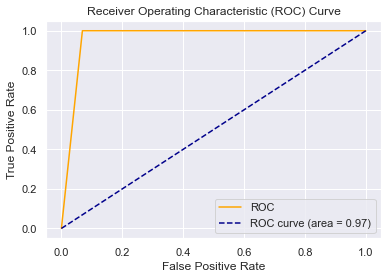

In [156]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. 
Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.


#### Advantages of Logisitic Regression

* It is very simple and easy to implement.
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables
* Very effective with linearly seperable data

#### Disadvantages of Logisitic Regression

* Not effective with data which are not linearly seperable 
* Not as powerful as other classification models
* Multiclass classifications are much easier to do with other algorithms than logisitic regression
* It can only predict categorical outcomes






#### Model to .SAV

In [221]:
import joblib
filename = 'logistic_regression_model.sav'
joblib.dump(loreg, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9672131147540983


#### Model to .PKL

In [220]:
import pickle
pickle.dump(loreg, open('logistic_regression_model.pkl', 'wb'))
pickled_model = pickle.load(open('logistic_regression_model.pkl', 'rb'))
pickled_model.score(X_test,y_test)

0.9672131147540983